In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display, Markdown


import warnings
# Suppress the FutureWarning specifically
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your code using Seaborn
import seaborn as sns


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 88.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.10.1 requires cubinlinker, which is not installed.
cudf 24.10.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.10.1 requires libcudf==24.10.*, which is not installed.
cudf 24.10.1 requires ptxcompiler, which is not installed.
cuml 24.10.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 24.10.0 requires cuvs==24.10.*, which is not installed.
cuml 24.10.0 requires nvidia-cublas, which is not installed.
cuml 24.10.0 requires nvidia-cufft, which is not installed.
cuml 24.10.0 re

# 1. Data Understanding & Preparation


In [4]:
import pandas as pd
from IPython.display import display, Markdown

# Load the captions file
captions_path = "/kaggle/input/flickr8k/small_flickr8k/captions.txt"  # Update with the actual path
with open(captions_path, 'r') as file:
    lines = file.readlines()

# Parse the captions into a DataFrame
data = []
for line in lines:
    image_id, caption = line.strip().split(',', 1)
    data.append({'image_id': image_id, 'caption': caption})

captions_df = pd.DataFrame(data)

# Adjust pandas settings to ensure full display of the rows and captions
pd.set_option('display.max_rows', None)  # To show all rows (useful if you're not limiting the rows)
pd.set_option('display.max_colwidth', None)  # To prevent truncation of long captions
pd.set_option('display.width', None)  # Prevent line wrapping, useful for very long rows

print('\n')
display(Markdown('**Sample of the Captions in the Dataset :**'))
display(captions_df.head(6))  # Display first 6 rows to inspect the output

# Basic statistics
print(f"\nTotal captions: {len(captions_df)}")
print(f"Unique images: {captions_df['image_id'].nunique()}")


**Sample of the Captions in the Dataset :**

image_id  \
0   462198798_89e2df0358.jpg   
1   462198798_89e2df0358.jpg   
2   462198798_89e2df0358.jpg   
3   462198798_89e2df0358.jpg   
4   462198798_89e2df0358.jpg   
5  2612040125_0a93889f06.jpg   

                                                                       caption  
0                     "A big , black dog is walking along the water 's edge ."  
1  A black dog and its reflection are seen near a pond ringed by dry foliage .  
2                           A black dog is walking beside water in the woods .  
3                                    A black dog walks along a marsh 's edge .  
4                                      A dog is walking near a body of water .  
5           two brown and black dogs chasing a plastic bag through the grass .


Total captions: 2500
Unique images: 500


In [5]:
# 1.2 Data Cleaning
# Check for missing captions
print(f"\nMissing captions: {captions_df['caption'].isnull().sum()}")

# Remove rows with missing captions if any
captions_df.dropna(subset=['caption'], inplace=True)

# Check for malformed captions (e.g., empty captions)
captions_df = captions_df[captions_df['caption'].str.strip() != '']

# Check the cleaned dataset
print(f"\nAfter cleaning, total captions: {len(captions_df)}")
print(f"Unique images after cleaning: {captions_df['image_id'].nunique()}")



Missing captions: 0

After cleaning, total captions: 2500
Unique images after cleaning: 500


**1.3 Text Preprocessing**

In [6]:
import pandas as pd
import re
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function for text preprocessing using spaCy
def preprocess_caption(caption):
    # Lowercase the text
    caption = caption.lower()

    # Remove punctuation and special characters
    caption = re.sub(r'[^\w\s]', '', caption)
    
    # Process the text with spaCy
    doc = nlp(caption)

    # Tokenization, stopword removal, and lemmatization
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    # Join tokens back to a single string
    return ' '.join(tokens)

# Load your dataset (assuming you've already done this)
captions_path = "/kaggle/input/flickr8k/small_flickr8k/captions.txt"  # Update with your path
with open(captions_path, 'r') as file:
    lines = file.readlines()

# Parse the captions into a DataFrame
data = []
for line in lines:
    image_id, caption = line.strip().split(',', 1)
    data.append({'image_id': image_id, 'caption': caption})

captions_df = pd.DataFrame(data)

# Apply preprocessing to the captions
captions_df['processed_caption'] = captions_df['caption'].apply(preprocess_caption)

# Display a sample of the processed captions
print("\nSample of the processed captions:")
display(captions_df[['image_id', 'processed_caption']].head(6))

# You can also check the stats after preprocessing if necessary
print(f"\nTotal captions after preprocessing: {len(captions_df)}")
print(f"Unique images: {captions_df['image_id'].nunique()}")



Sample of the processed captions:


image_id  \
0   462198798_89e2df0358.jpg   
1   462198798_89e2df0358.jpg   
2   462198798_89e2df0358.jpg   
3   462198798_89e2df0358.jpg   
4   462198798_89e2df0358.jpg   
5  2612040125_0a93889f06.jpg   

                                     processed_caption  
0                    big   black dog walk water s edge  
1  black dog reflection see near pond ring dry foliage  
2                            black dog walk water wood  
3                          black dog walk marsh s edge  
4                             dog walk near body water  
5              brown black dog chase plastic bag grass


Total captions after preprocessing: 2500
Unique images: 500


### **Caption Length Statistics**

Statistic        Value
0    Mean Caption Length  11.78 words
1  Median Caption Length  11.00 words
2     Max Caption Length     29 words
3     Min Caption Length      2 words

# **Distribution Plot of the Captions :**

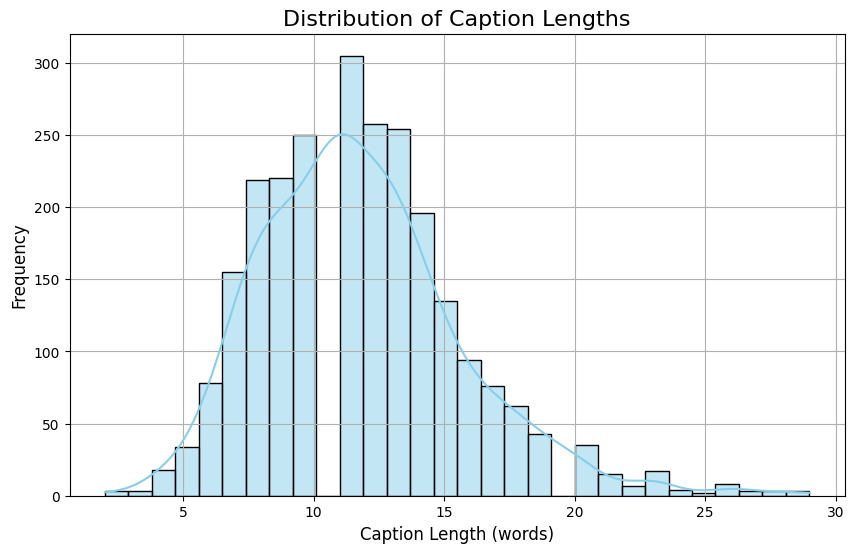

In [7]:
from IPython.display import display, Markdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure no missing values in the captions column
captions_df['caption'] = captions_df['caption'].fillna('')

# Calculate the length of each caption (number of words)
captions_df['caption_length'] = captions_df['caption'].apply(lambda x: len(x.split()))

# Calculate statistics
mean_length = captions_df['caption_length'].mean()
median_length = captions_df['caption_length'].median()
max_length = captions_df['caption_length'].max()
min_length = captions_df['caption_length'].min()

# Data for the table
data = {
    "Statistic": ["Mean Caption Length", "Median Caption Length", "Max Caption Length", "Min Caption Length"],
    "Value": [f"{mean_length:.2f} words", f"{median_length:.2f} words", f"{max_length} words", f"{min_length} words"]
}

# Create a DataFrame for statistics
df = pd.DataFrame(data)

# Display the table
display(Markdown('### **Caption Length Statistics**'))
display(df)

# Display the heading for the plot
display(Markdown('# **Distribution Plot of the Captions :**'))

# Plot the distribution of caption lengths
plt.figure(figsize=(10, 6))
sns.histplot(captions_df['caption_length'], bins=30, kde=True, color='skyblue')  # Increased bins for finer granularity
plt.title('Distribution of Caption Lengths', fontsize=16)
plt.xlabel('Caption Length (words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


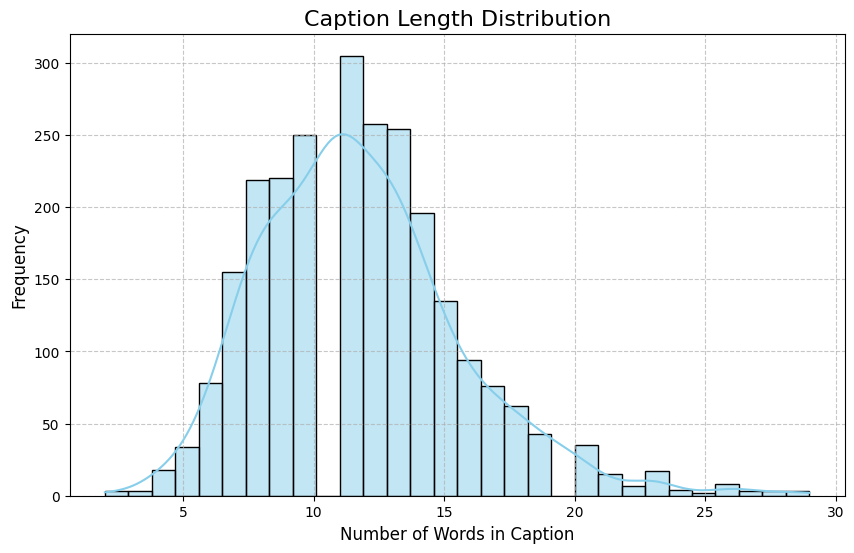

Mean Caption Length: 11.78 words
Median Caption Length: 11.0 words
Standard Deviation of Caption Length: 3.88 words
Max Caption Length: 29 words
Min Caption Length: 2 words


In [8]:
# Step 1: Handle missing values and calculate the length of each caption (in terms of words)
captions_df['caption'] = captions_df['caption'].fillna('')  # Fill missing values with empty strings
captions_df['caption_length'] = captions_df['caption'].apply(lambda x: len(x.split()))

# Step 2: Plot the caption length distribution
plt.figure(figsize=(10, 6))
sns.histplot(captions_df['caption_length'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Caption Length Distribution', fontsize=16)
plt.xlabel('Number of Words in Caption', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Added grid style and transparency
plt.show()

# Step 3: Basic statistics on caption lengths
mean_length = captions_df['caption_length'].mean()
median_length = captions_df['caption_length'].median()
std_length = captions_df['caption_length'].std()
max_length = captions_df['caption_length'].max()
min_length = captions_df['caption_length'].min()

# Print statistics
print(f"Mean Caption Length: {mean_length:.2f} words")
print(f"Median Caption Length: {median_length} words")
print(f"Standard Deviation of Caption Length: {std_length:.2f} words")
print(f"Max Caption Length: {max_length} words")
print(f"Min Caption Length: {min_length} words")


**Top 10 most common words :**

word  frequency
0      a       3958
7    the       1161
23    in       1159
74    on        684
4     is        568
11   and        512
3    dog        495
90   man        489
58  with        450
28    of        408

# **Top 20 Common Words :**

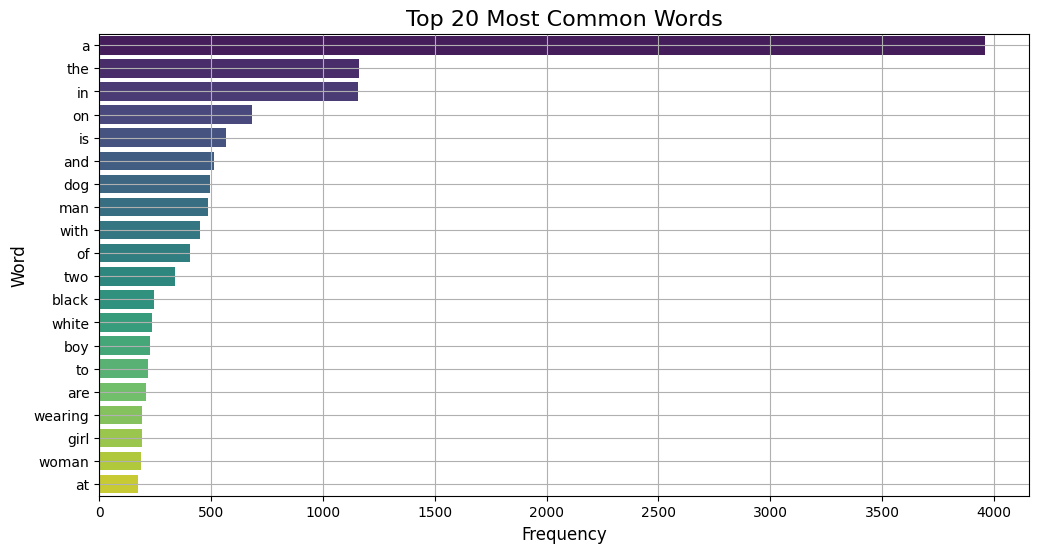

In [9]:
from collections import Counter
import pandas as pd
from IPython.display import display, Markdown
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Combine all captions into a single string
all_words = ' '.join(captions_df['caption'].str.lower())

# Remove punctuation and special characters
all_words = re.sub(r'[^\w\s]', '', all_words)

# Split into individual words and count frequencies
word_counts = Counter(all_words.split())

# Display the most common words in a Markdown cell
display(Markdown('**Top 10 most common words :**'))

# Create a DataFrame for word frequencies
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Display the top 10 most common words in a table format
display(word_freq_df.head(10))

# Bar plot for the top 20 most common words
display(Markdown('# **Top 20 Common Words :**'))

# Plot the top 20 most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq_df.head(20)['frequency'], y=word_freq_df.head(20)['word'], palette='viridis')
plt.title('Top 20 Most Common Words', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.grid(True)
plt.show()


# **Word Cloud :**

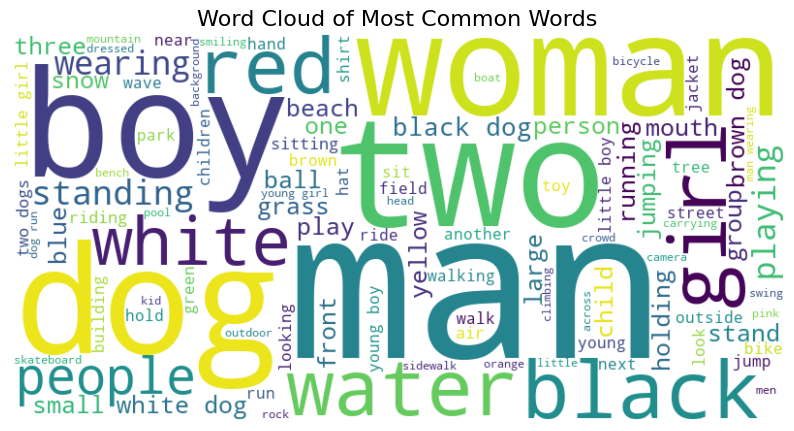

In [10]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(all_words)

display(Markdown('# **Word Cloud :**'))
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words', fontsize=16)
plt.show()


**Top 10 Bigrams:**

ngram  frequency
0     black dog         78
1     white dog         77
2     brown dog         74
3   dog running         56
4    little boy         49
5   man wearing         40
6   little girl         38
7     young boy         36
8   black white         34
9  group people         31

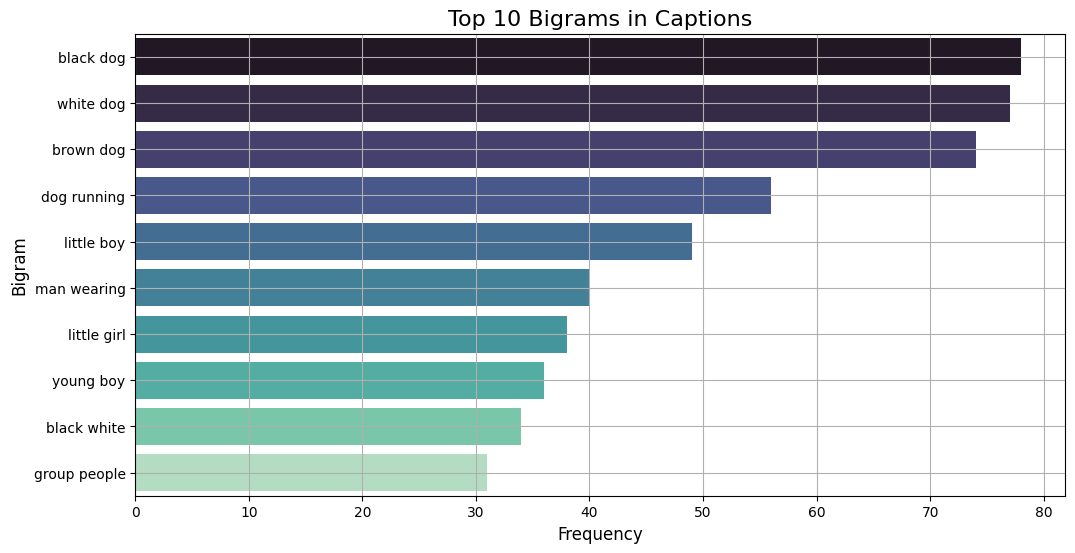

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from IPython.display import display, Markdown

# Function to extract n-grams
def get_top_ngrams(corpus, n, ngram_range=(2, 2), top_k=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.toarray().sum(axis=0)
    ngrams = vectorizer.get_feature_names_out()
    ngram_freq = sorted(list(zip(ngrams, ngram_counts)), key=lambda x: x[1], reverse=True)[:top_k]
    return pd.DataFrame(ngram_freq, columns=['ngram', 'frequency'])

# Get top 10 bigrams
bigrams_df = get_top_ngrams(captions_df['caption'], n=2, ngram_range=(2, 2), top_k=10)

# Display bigrams
display(Markdown('**Top 10 Bigrams:**'))
display(bigrams_df)


# Bar plot for bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x=bigrams_df['frequency'], y=bigrams_df['ngram'], palette='mako')
plt.title('Top 10 Bigrams in Captions', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigram', fontsize=12)
plt.grid(True)
plt.show()


**Top 10 Trigrams :**

ngram  frequency
0      black white dog         25
1    white dog running         14
2      brown white dog         12
3    black dog running          9
4    man wearing black          8
5      large brown dog          7
6      small brown dog          7
7  woman wearing white          7
8      black brown dog          6
9    brown dog running          6

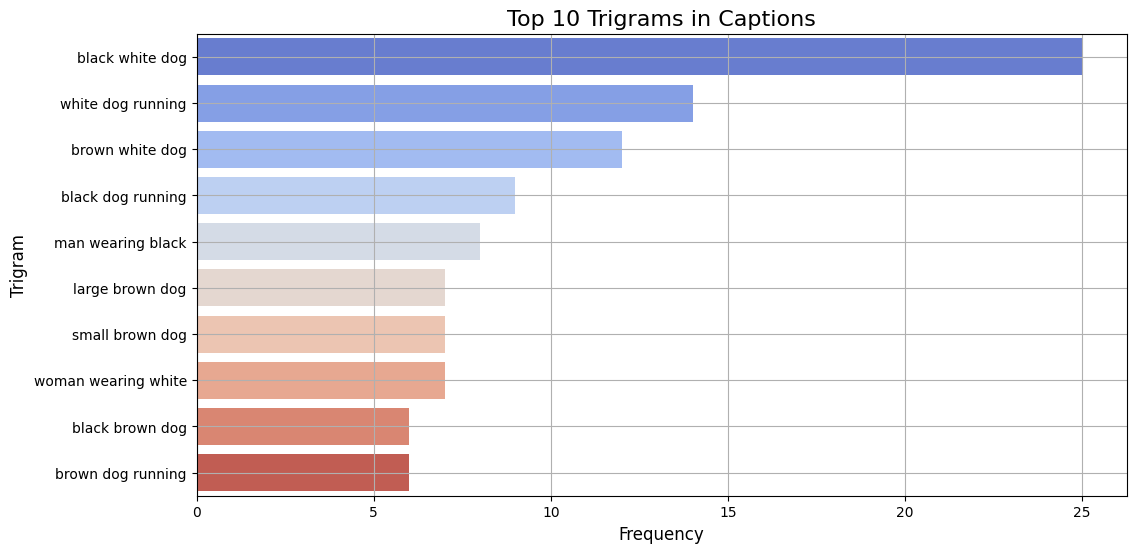

In [12]:
# Get top 10 trigrams
trigrams_df = get_top_ngrams(captions_df['caption'], n=3, ngram_range=(3, 3), top_k=10)

# Display trigrams
display(Markdown('**Top 10 Trigrams :**'))
display(trigrams_df)

# Bar plot for trigrams
plt.figure(figsize=(12, 6))
sns.barplot(x=trigrams_df['frequency'], y=trigrams_df['ngram'], palette='coolwarm')
plt.title('Top 10 Trigrams in Captions', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigram', fontsize=12)
plt.grid(True)
plt.show()


**Caption Diversity Statistics:**

Statistic Value
0    Mean Unique Captions  5.00
1  Median Unique Captions  5.00
2     Max Unique Captions     5
3     Min Unique Captions     4

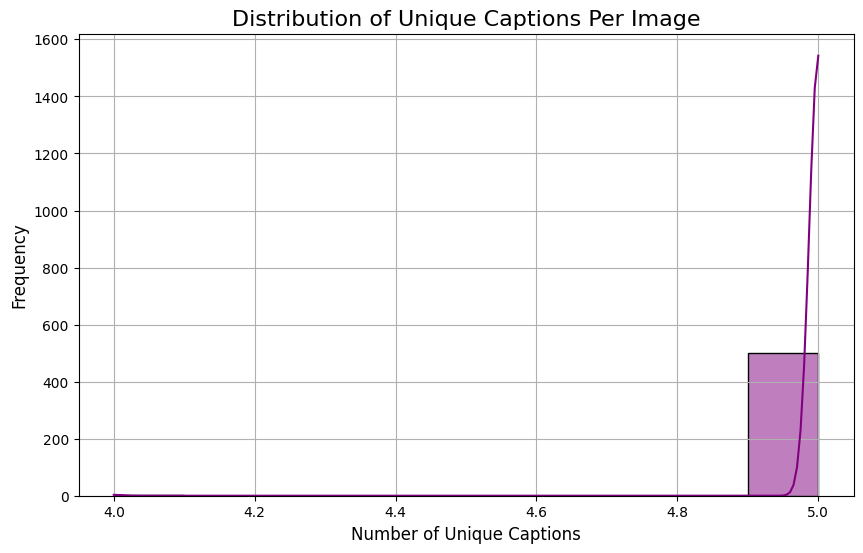

**Images with the Most Diverse Captions:**

image_id
1003163366_44323f5815.jpg    5
1055623002_8195a43714.jpg    5
1067180831_a59dc64344.jpg    5
1079274291_9aaf896cc1.jpg    5
1088767354_2acee738cf.jpg    5
Name: caption, dtype: int64

image_id
783353797_fdf91bdf4c.jpg    5
820169182_f5e78d7d19.jpg    5
854333409_38bc1da9dc.jpg    5
862156271_3eacea90a8.jpg    5
878758390_dd2cdc42f6.jpg    5
Name: caption, dtype: int64

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Count the number of unique captions per image
caption_diversity = captions_df.groupby('image_id')['caption'].nunique()

# Summary statistics for caption diversity
caption_diversity_stats = {
    "Statistic": ["Mean Unique Captions", "Median Unique Captions", "Max Unique Captions", "Min Unique Captions"],
    "Value": [f"{caption_diversity.mean():.2f}", f"{caption_diversity.median():.2f}", f"{caption_diversity.max()}", f"{caption_diversity.min()}"]
}

# Create a DataFrame for summary statistics
caption_diversity_df = pd.DataFrame(caption_diversity_stats)

# Display caption diversity statistics in table format
display(Markdown("**Caption Diversity Statistics:**"))
display(caption_diversity_df)

# Visualize the distribution of unique captions per image
plt.figure(figsize=(10, 6))
sns.histplot(caption_diversity, bins=10, kde=True, color='purple')
plt.title('Distribution of Unique Captions Per Image', fontsize=16)
plt.xlabel('Number of Unique Captions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Identify images with the highest caption diversity
most_diverse_images = caption_diversity[caption_diversity == caption_diversity.max()]

# Display the most diverse images in a clean format
display(Markdown("**Images with the Most Diverse Captions:**"))
display(most_diverse_images.head())
display(most_diverse_images.tail())  


In [14]:
import nltk
from nltk import pos_tag, word_tokenize
from collections import Counter

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Top 10 POS Tags:**

POS  Frequency
4    NN       7571
1    DT       5443
7    IN       3946
2    JJ       2494
9     .       2269
6   VBG       1680
15  NNS       1600
5   VBZ       1181
16   CD        568
11   CC        515

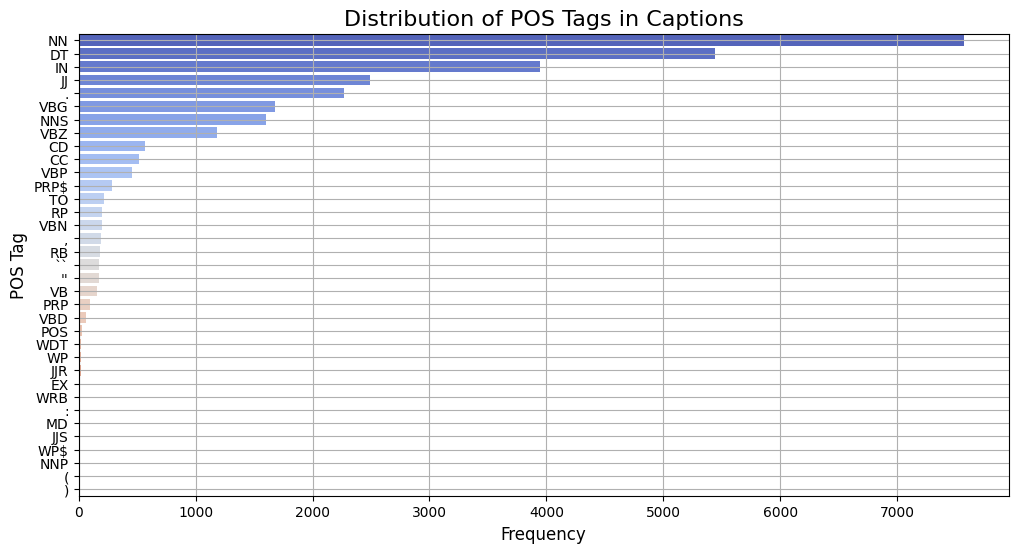

In [15]:
# Tokenize and POS tag each caption
def pos_tag_captions(captions):
    pos_counts = Counter()
    for caption in captions:
        tokens = word_tokenize(caption.lower())  # Tokenize the caption
        tags = pos_tag(tokens)  # Perform POS tagging
        pos_counts.update(tag for _, tag in tags)  # Update POS counts
    return pos_counts

# Get POS tags for all captions
pos_counts = pos_tag_captions(captions_df['caption'])

# Convert to DataFrame for easier visualization
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display top 10 POS tags
display(Markdown("**Top 10 POS Tags:**"))
display(pos_df.head(10))

# Bar plot for POS tag distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=pos_df['Frequency'], y=pos_df['POS'], palette='coolwarm')
plt.title('Distribution of POS Tags in Captions', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('POS Tag', fontsize=12)
plt.grid(True)
plt.show()


POS Tagging: Classifies words into categories like nouns (NN), verbs (VB), adjectives (JJ), etc.


**Sentiment Distribution:**

Sentiment  Count
0   Neutral   1339
1  Negative    756
2  Positive    405

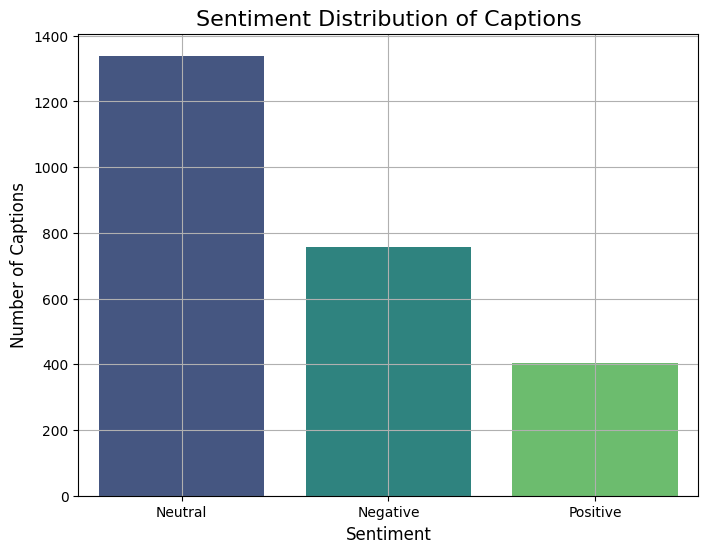

In [16]:
import pandas as pd
from textblob import TextBlob
from IPython.display import display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'captions_df' is already defined with 'image_id' and 'caption' columns
# Example: captions_df = pd.DataFrame([...])

# Function to analyze sentiment using TextBlob
def analyze_sentiment(caption):
    sentiment = TextBlob(caption).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to captions
captions_df['sentiment'] = captions_df['caption'].apply(analyze_sentiment)

# Display sentiment distribution header
display(Markdown("**Sentiment Distribution:**"))

# Calculate sentiment counts
sentiment_counts = captions_df['sentiment'].value_counts()

# Convert the sentiment counts to a DataFrame for a cleaner table format
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['Sentiment', 'Count']

# Display sentiment distribution table
display(sentiment_df)

# Bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Captions', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Captions', fontsize=12)
plt.grid(True)
plt.show()


**Caption Similarity Statistics:**

Statistic Value
0    Mean Similarity Score  0.22
1  Median Similarity Score  0.20
2     Max Similarity Score  0.60
3     Min Similarity Score  0.04

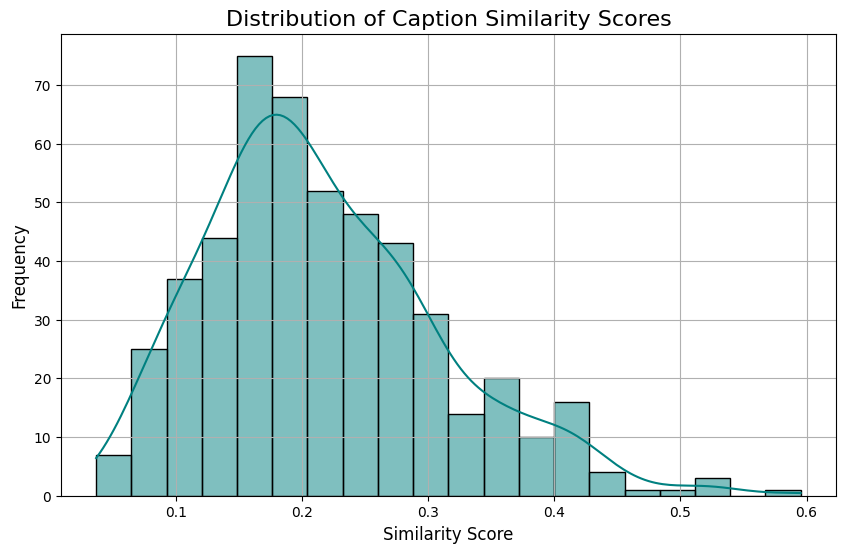

**Images with Similarity Scores:**

image_id  similarity_score
0  1003163366_44323f5815.jpg          0.242361
1  1055623002_8195a43714.jpg          0.391705
2  1067180831_a59dc64344.jpg          0.349373
3  1079274291_9aaf896cc1.jpg          0.190568
4  1088767354_2acee738cf.jpg          0.213246

image_id  similarity_score
495  783353797_fdf91bdf4c.jpg          0.187252
496  820169182_f5e78d7d19.jpg          0.128054
497  854333409_38bc1da9dc.jpg          0.184906
498  862156271_3eacea90a8.jpg          0.140211
499  878758390_dd2cdc42f6.jpg          0.526099

In [17]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Function to compute similarity scores for captions of the same image
def compute_similarity(captions):
    if len(captions) < 2:
        return 0  # No comparison if there's only one caption
    tfidf = TfidfVectorizer(stop_words='english').fit_transform(captions)
    sim_matrix = cosine_similarity(tfidf)
    # Extract upper triangular values of similarity matrix (excluding diagonal)
    sim_scores = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
    return sim_scores.mean() if len(sim_scores) > 0 else 0

# Group captions by image and compute similarity
similarity_scores = captions_df.groupby('image_id')['caption'].apply(compute_similarity)

# Add similarity scores to DataFrame
image_similarity_df = similarity_scores.reset_index(name='similarity_score')

# Create a DataFrame for summary statistics
similarity_stats = {
    "Statistic": ["Mean Similarity Score", "Median Similarity Score", "Max Similarity Score", "Min Similarity Score"],
    "Value": [f"{image_similarity_df['similarity_score'].mean():.2f}",
              f"{image_similarity_df['similarity_score'].median():.2f}",
              f"{image_similarity_df['similarity_score'].max():.2f}",
              f"{image_similarity_df['similarity_score'].min():.2f}"]
}

# Create a DataFrame for the statistics
similarity_stats_df = pd.DataFrame(similarity_stats)

# Display similarity statistics in table format
display(Markdown("**Caption Similarity Statistics:**"))
display(similarity_stats_df)

# Visualize the distribution of similarity scores
plt.figure(figsize=(10, 6))
sns.histplot(image_similarity_df['similarity_score'], bins=20, kde=True, color='teal')
plt.title('Distribution of Caption Similarity Scores', fontsize=16)
plt.xlabel('Similarity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Display images with similarity scores
display(Markdown("**Images with Similarity Scores:**"))
display(image_similarity_df.head())
display(image_similarity_df.tail())


**Lexical Richness Analysis:**

Total Tokens: 29459
Unique Tokens: 2299
Hapax Legomena: 1061
TTR (Type-Token Ratio): 0.08


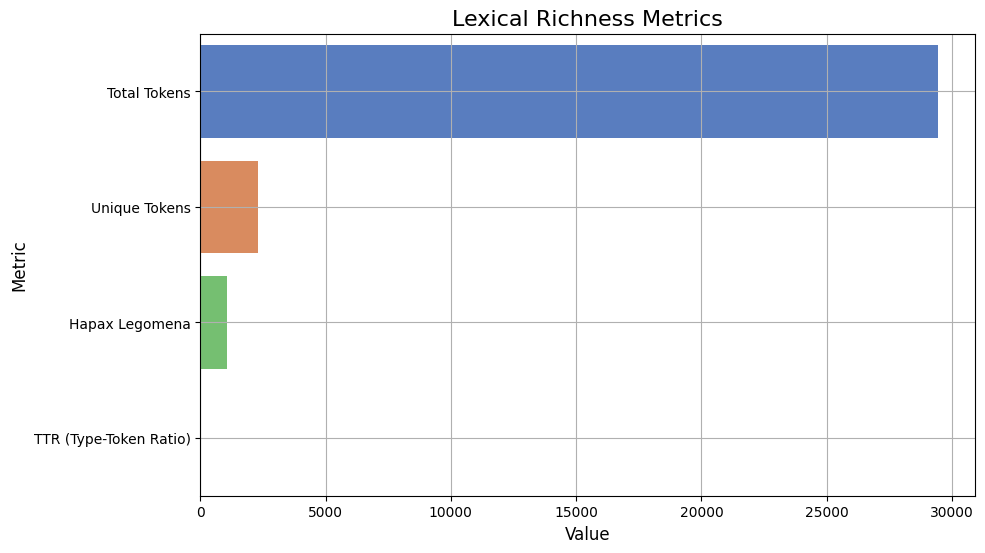

In [18]:
# Function to calculate lexical richness metrics
def lexical_richness_analysis(captions):
    tokens = [word for caption in captions for word in caption.lower().split()]
    total_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    hapax_legomena = len([word for word in set(tokens) if tokens.count(word) == 1])
    ttr = unique_tokens / total_tokens  # Type-Token Ratio
    
    return {
        'Total Tokens': total_tokens,
        'Unique Tokens': unique_tokens,
        'Hapax Legomena': hapax_legomena,
        'TTR (Type-Token Ratio)': ttr
    }

# Perform lexical richness analysis
lexical_metrics = lexical_richness_analysis(captions_df['caption'])

# Display the results
display(Markdown("**Lexical Richness Analysis:**"))

for metric, value in lexical_metrics.items():
    print(f"{metric}: {value:.2f}" if isinstance(value, float) else f"{metric}: {value}")

# Bar plot for lexical metrics
metrics_df = pd.DataFrame(list(lexical_metrics.items()), columns=['Metric', 'Value'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Metric', data=metrics_df, palette='muted')
plt.title('Lexical Richness Metrics', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.grid(True)
plt.show()


Explanation:

Type-Token Ratio (TTR): Measures vocabulary diversity.
Higher TTR indicates greater lexical variet
y.
Hapax Legomena: Counts words that appear only once, indicating uniqueness in word usage.


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7bfc905013f0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /opt/conda/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


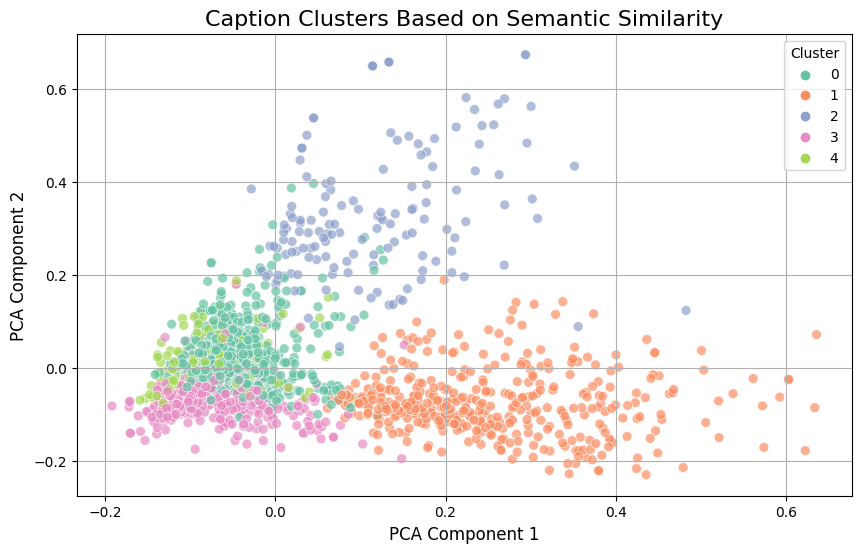


Representative Captions from Each Cluster:

Cluster 0:
  1. Two women on the side of a road .
  2. A person hits a ball with a tennis racket .
  3. A yellow car drives quickly in the snow .

Cluster 1:
  1. Black and white dog holding a baseball in mouth .
  2. A tan dog with a black collar barking in the snow .
  3. A dog is digging a large hole in a yard to find something .

Cluster 2:
  1. Two dogs touching noses near another dog .
  2. "Two dogs run through the snow , one with a tennis ball ."
  3. Two black dogs jump in the snow .

Cluster 3:
  1. A white woman holding a Panasonic video camera in a park .
  2. A man dives into a lake .
  3. A young man skateboards off a pink railing .

Cluster 4:
  1. A boy jumping over some water .
  2. A small boy leaps from one bed to another .
  3. a boy in a white shirt and jeans in what looks like a black camper


In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Vectorize captions using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(captions_df['caption'])

# Step 2: Apply KMeans clustering
num_clusters = 5  # You can adjust this number based on your dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
captions_df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Step 3: Reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
captions_df['x'] = reduced_features[:, 0]
captions_df['y'] = reduced_features[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='x', y='y', hue='cluster', data=captions_df,
    palette='Set2', s=50, alpha=0.7
)
plt.title('Caption Clusters Based on Semantic Similarity', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

# Display representative captions from each cluster
print("\nRepresentative Captions from Each Cluster:")
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    sample_captions = captions_df[captions_df['cluster'] == cluster]['caption'].sample(3, random_state=42).tolist()
    for i, caption in enumerate(sample_captions, 1):
        print(f"  {i}. {caption}")



Top Keywords for Each Topic:
Topic 1: woman, mouth, snow, grass, running, brown, dogs, white, black, dog
Topic 2: lake, boat, standing, girl, walks, tennis, child, young, water, man
Topic 3: ball, sitting, young, player, shirt, white, wearing, girl, blue, man
Topic 4: climbing, street, rock, standing, men, woman, group, girl, man, people
Topic 5: pool, green, person, shirt, wearing, little, playing, red, man, boy


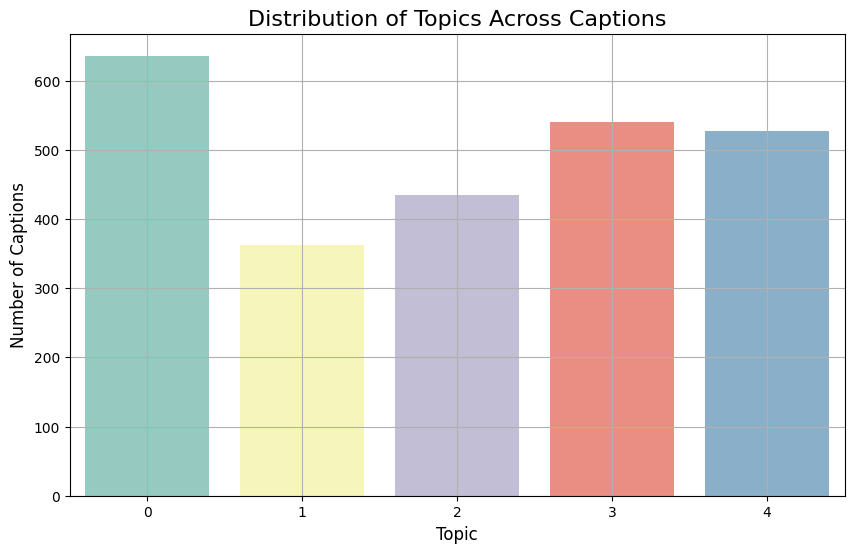

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suppress all DeprecationWarnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)


# Step 1: Vectorize captions using CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
count_matrix = count_vectorizer.fit_transform(captions_df['caption'])

# Step 2: Apply LDA for topic modeling
num_topics = 5  # Adjust this based on your dataset
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(count_matrix)

# Step 3: Assign dominant topics to captions
captions_df['dominant_topic'] = lda_model.transform(count_matrix).argmax(axis=1)

# Display topic keywords
print("\nTop Keywords for Each Topic:")
for topic_idx, topic in enumerate(lda_model.components_):
    top_keywords = [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_keywords)}")

# Step 4: Visualize topic distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=captions_df, x='dominant_topic', palette='Set3')
plt.title('Distribution of Topics Across Captions', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Number of Captions', fontsize=12)
plt.grid(True)
plt.show()


Fetching Embeddings: 100%|██████████| 10/10 [00:00<00:00, 78988.78it/s]


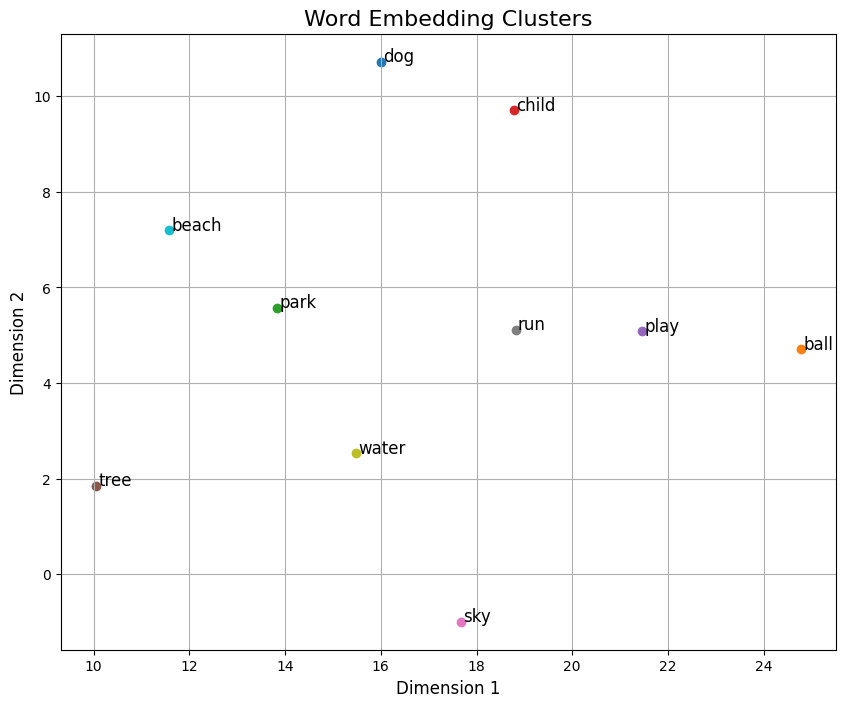

In [21]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # Optional, only if you want progress bars

import sys
import os

# Suppress stdout (standard output) during download
sys.stdout = open(os.devnull, 'w')

# Step 1: Load Pre-Trained Word Embeddings (Word2Vec)
word_vectors = api.load('word2vec-google-news-300')

# Restore stdout (standard output) after loading the model
sys.stdout = sys.__stdout__

# Example: Words from captions
words_of_interest = ['dog', 'ball', 'park', 'child', 'play', 'tree', 'sky', 'run', 'water', 'beach']

# Step 2: Retrieve Embeddings for Words in Vocabulary
embeddings = []
valid_words = []

# Use tqdm for a progress bar while iterating over the words (optional)
for word in tqdm(words_of_interest, desc="Fetching Embeddings"):
    if word in word_vectors:
        embeddings.append(word_vectors[word])
        valid_words.append(word)

embeddings = np.array(embeddings)

# Step 3: Reduce Dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Adjusted perplexity set it default for 30k

reduced_embeddings = tsne.fit_transform(embeddings)

# Step 4: Visualize the Word Embedding Clusters
plt.figure(figsize=(10, 8))
for i, word in enumerate(valid_words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.05, reduced_embeddings[i, 1], word, fontsize=12)

plt.title('Word Embedding Clusters', fontsize=16)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.grid(True)
plt.show()


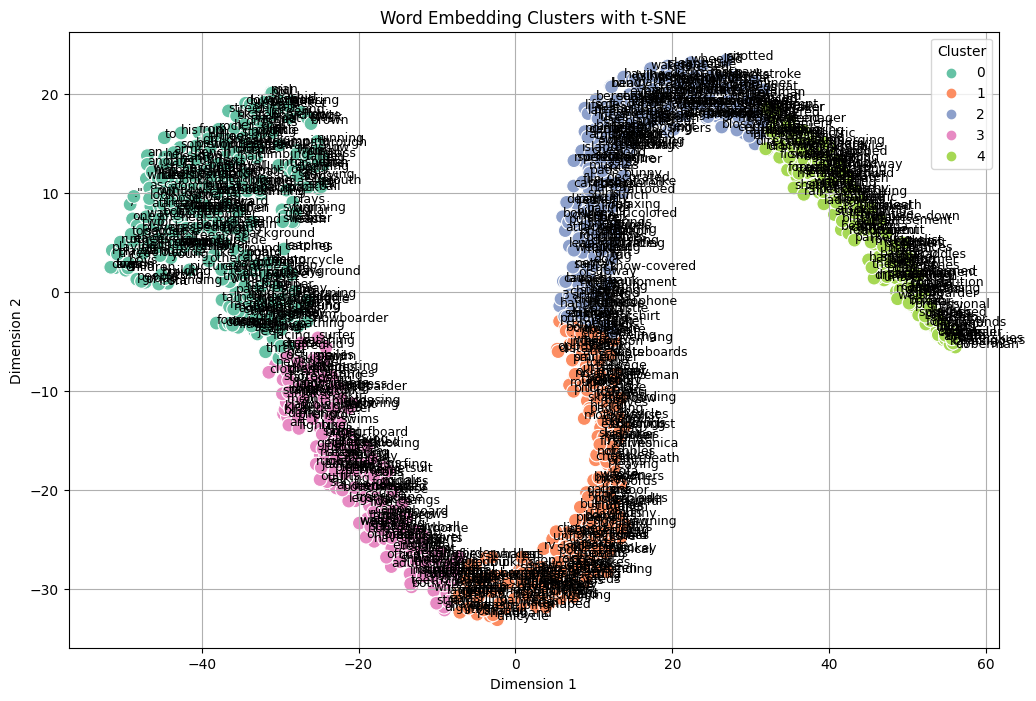

In [22]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from collections import Counter
from itertools import combinations

# Assuming captions_df is already loaded and contains a column 'caption'

# Step 1: Prepare the Data (Expand Vocabulary)
def preprocess_captions(captions):
    """Tokenize captions and return a list of word lists."""
    return [caption.lower().split() for caption in captions]

# Tokenize captions
tokenized_captions = preprocess_captions(captions_df['caption'])

# Train Word2Vec Model (Expanded Vocabulary)
word2vec_model = Word2Vec(sentences=tokenized_captions, vector_size=100, window=5, min_count=2, sg=1, seed=42)

# Extract Word Vectors for All Words
words = list(word2vec_model.wv.index_to_key)
vectors = np.array([word2vec_model.wv[word] for word in words])

# Step 2: Apply t-SNE to Visualize Word Embeddings
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Default perplexity for expanded dataset
reduced_vectors = tsne.fit_transform(vectors)

# Step 3: Context Analysis (Co-occurrence)
def compute_cooccurrences(captions, top_n=20):
    """Compute word co-occurrence counts."""
    cooccurrence_counts = Counter()
    for caption in captions:
        for pair in combinations(set(caption), 2):
            cooccurrence_counts[tuple(sorted(pair))] += 1
    return cooccurrence_counts.most_common(top_n)

# Get top 20 co-occurring word pairs
top_cooccurrences = compute_cooccurrences(tokenized_captions)

# Step 4: Apply KMeans Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_vectors)

# Step 5: Plot t-SNE with Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], 
    hue=clusters, palette='Set2', legend='full', s=100
)

# Annotate words on the plot
for i, word in enumerate(words):
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=9)

plt.title('Word Embedding Clusters with t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 6: Display Top Co-occurrences
print("Top 20 Co-occurring Word Pairs:")
for pair, count in top_cooccurrences:
    print(f"{pair}: {count}")


**Visualizing Clusters with Labels: We can plot the clusters and annotate the cluster labels on the t-SNE plot.**

**2. Word Embedding Comparisons:**

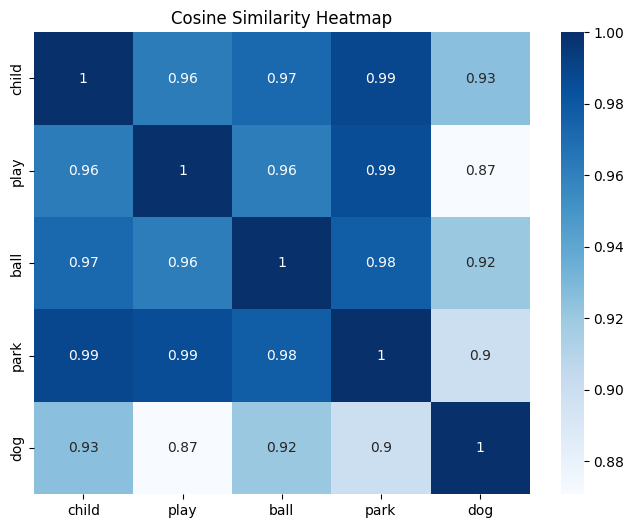

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Select a subset of words to compare
words_to_compare = ['child', 'play', 'ball', 'park', 'dog']
word_vectors = np.array([word2vec_model.wv[word] for word in words_to_compare])

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(word_vectors)

# Create a heatmap to visualize the similarity matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim_matrix, annot=True, xticklabels=words_to_compare, yticklabels=words_to_compare, cmap='Blues')
plt.title("Cosine Similarity Heatmap")
plt.show()


**3. Semantic Trajectory:**

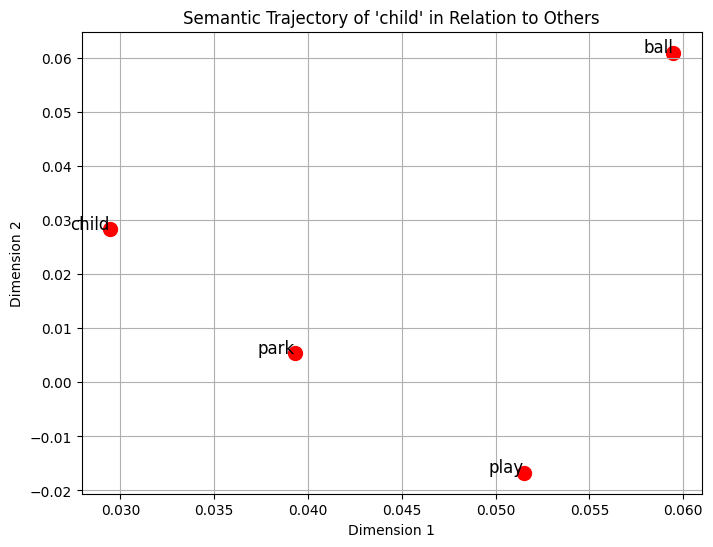

In [24]:
# Target word (e.g., "child")
target_word = 'child'
target_vector = word2vec_model.wv[target_word]

# Words to compare with (e.g., "play", "park", "ball")
words_to_compare = ['play', 'park', 'ball']
vectors_to_compare = np.array([word2vec_model.wv[word] for word in words_to_compare])

# Plot the trajectory of the target word relative to others
plt.figure(figsize=(8, 6))
plt.scatter([target_vector[0]] + vectors_to_compare[:, 0].tolist(),
            [target_vector[1]] + vectors_to_compare[:, 1].tolist(),
            color='red', s=100)

# Annotate points with words
plt.text(target_vector[0], target_vector[1], target_word, fontsize=12, ha='right', color='black')
for i, word in enumerate(words_to_compare):
    plt.text(vectors_to_compare[i, 0], vectors_to_compare[i, 1], word, fontsize=12, ha='right', color='black')

plt.title(f"Semantic Trajectory of '{target_word}' in Relation to Others")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


**6. Advanced Context Analysis (Co-occurrence Network):**

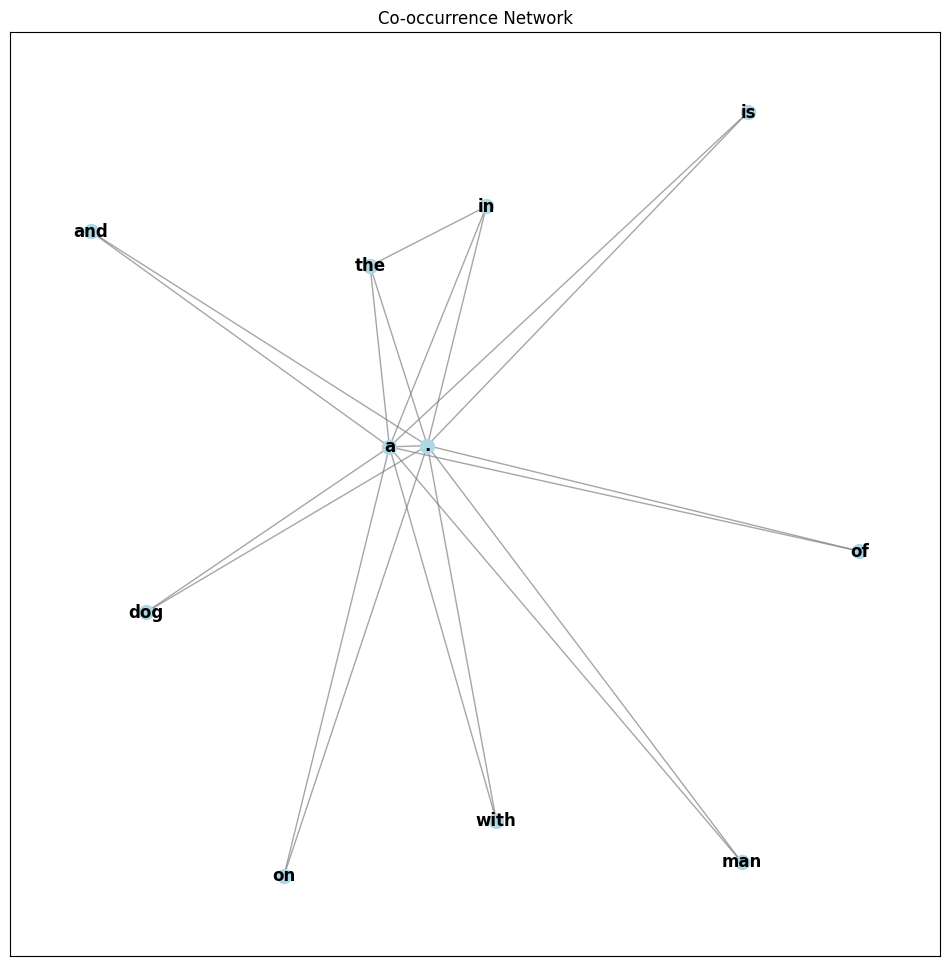

In [25]:
import networkx as nx

# Build the co-occurrence graph
G = nx.Graph()

# Add edges based on co-occurrence counts (from earlier)
for (word1, word2), count in top_cooccurrences:
    G.add_edge(word1, word2, weight=count)

# Visualize the co-occurrence graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')
plt.title("Co-occurrence Network")
plt.show()


**Identifying Key Nodes (Words) Using Centrality:**

# Image:

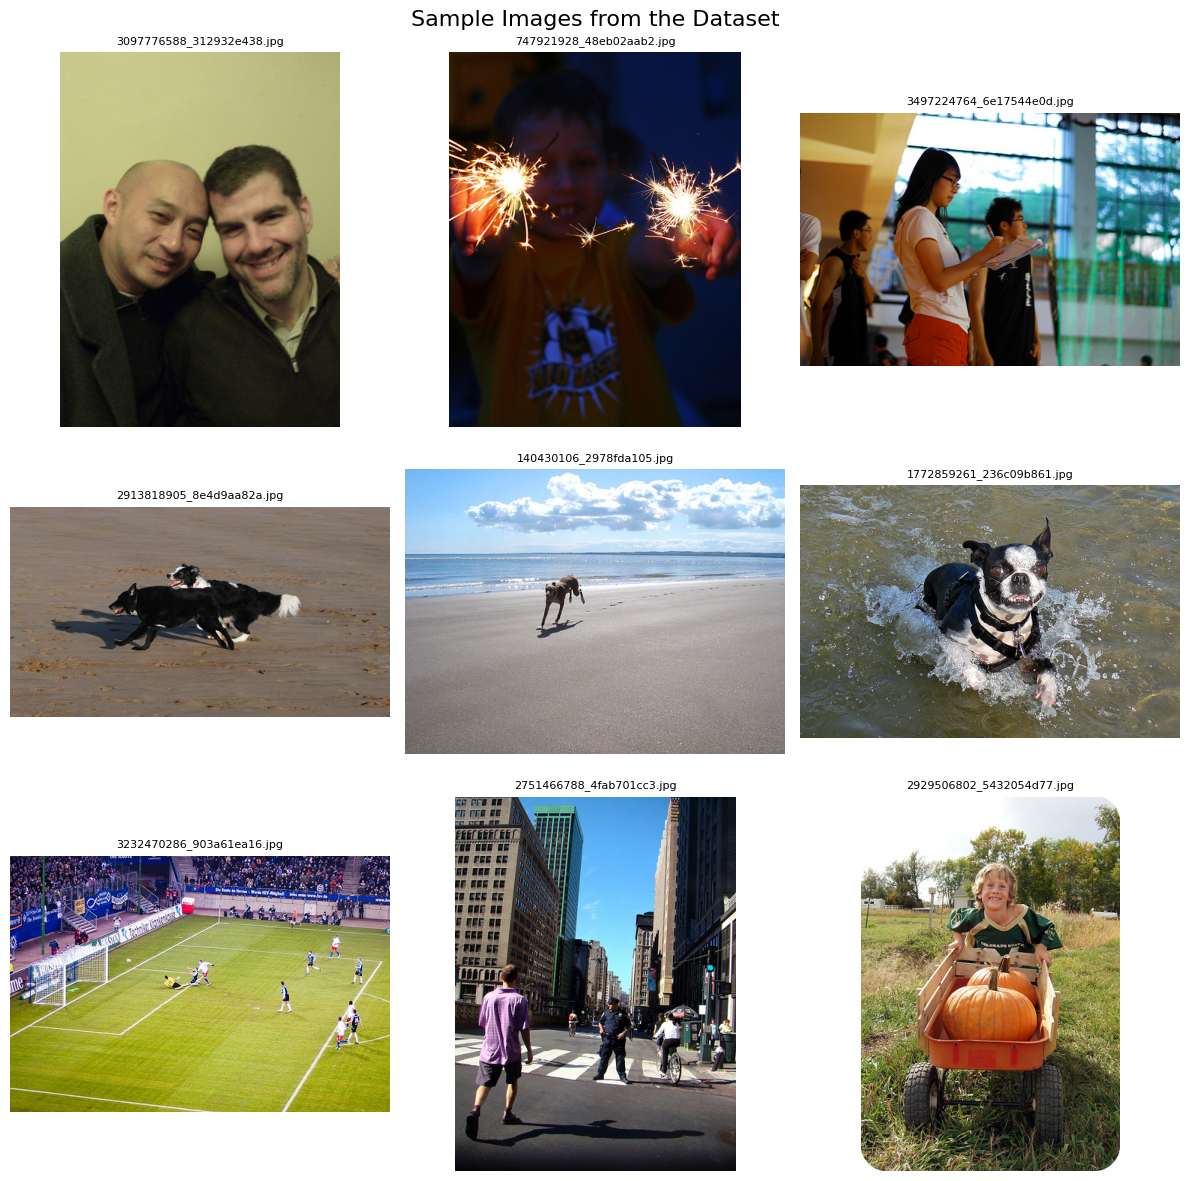

In [26]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to images folder
images_path = "/kaggle/input/flickr8k/small_flickr8k/images"

# List all image files
image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Basic stats
print(f"Total number of images: {len(image_files)}")

# Display a grid of random images
plt.figure(figsize=(12, 12))
for i in range(9):
    image = Image.open(os.path.join(images_path, image_files[i]))
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_files[i], fontsize=8)
plt.suptitle('Sample Images from the Dataset', fontsize=16)
plt.tight_layout()
plt.show()


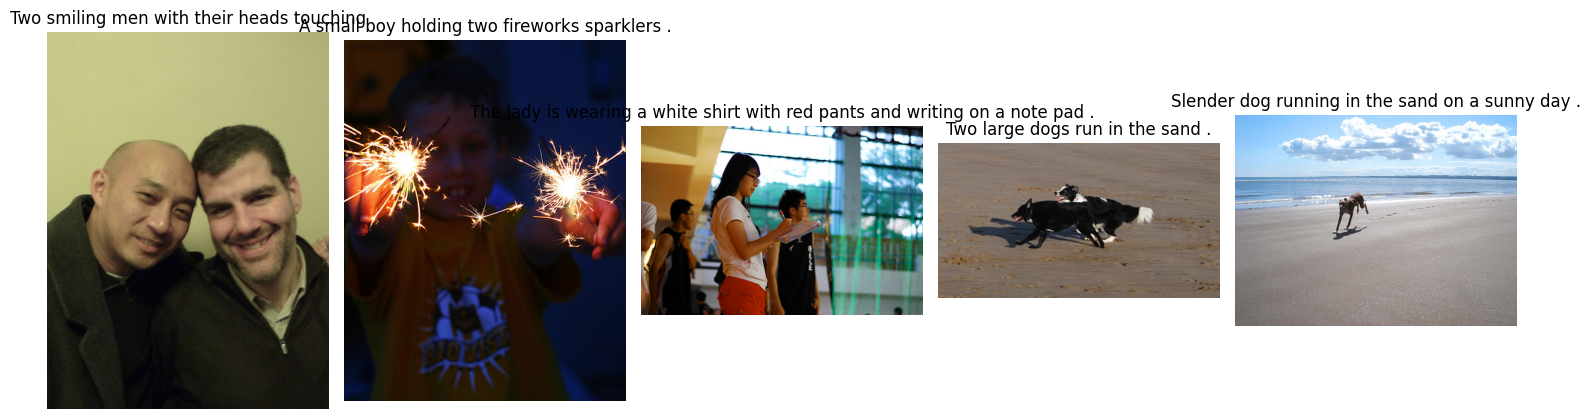

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load captions from file
def load_captions(captions_file):
    """
    Load captions from a file and return a dictionary mapping image IDs to captions.
    """
    captions = {}
    with open(captions_file, 'r') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split(',')
            image_id, caption = parts[0], ','.join(parts[1:])
            captions[image_id] = caption
    return captions

# Create image paths dictionary
def create_image_paths(image_dir):
    """
    Create a dictionary mapping image IDs to their file paths.
    """
    image_paths = {}
    for image_file in os.listdir(image_dir):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):  # Ensure valid image formats
            image_id = image_file
            image_paths[image_id] = os.path.join(image_dir, image_file)
    return image_paths

# Function to visualize image-caption pairs
def visualize_image_caption_pairs(image_paths, captions, num_pairs=5):
    """
    Visualizes a given number of image-caption pairs.
    
    Parameters:
    - image_paths: Dictionary mapping image IDs to file paths.
    - captions: Dictionary mapping image IDs to captions.
    - num_pairs: Number of pairs to display.
    """
    # Ensure we don't try to plot more pairs than we have
    num_pairs = min(num_pairs, len(image_paths))

    plt.figure(figsize=(15, 5))
    for i, (image_id, img_path) in enumerate(list(image_paths.items())[:num_pairs]):
        plt.subplot(1, num_pairs, i + 1)
        img = mpimg.imread(img_path)  # Read the image
        plt.imshow(img)
        caption = captions.get(image_id, "No caption available")
        plt.title(caption)  # Display the caption
        plt.axis('off')  # Hide axes
    
    plt.tight_layout()
    plt.show()

# File paths for captions and images
captions_file = '/kaggle/input/flickr8k/small_flickr8k/captions.txt'
image_dir = '/kaggle/input/flickr8k/small_flickr8k/images'

# Load captions and create image paths
captions = load_captions(captions_file)
image_paths = create_image_paths(image_dir)

# Visualize image-caption pairs
visualize_image_caption_pairs(image_paths, captions, num_pairs=5)
